In [9]:
# import
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib notebook
sns.set()


In [10]:
def get_nr_for_step(n):
    if n==0:
        return 1
    else:
        return  get_nr_for_step(n-1)+n+1

In [142]:
def compound_call(S0,K1,K2,T1,T2,risk_free,volatility,n,optiontype1='call',optiontype2='call'):
    n2=int(np.round(T1*n))
    dT=T2/n
    u=math.exp(volatility*math.sqrt(dT))
    d=1/u
    S=np.zeros(math.factorial(n-1))
    b=risk_free
    S[0]=S0
    S[1]=S0*u
    S[2]=S0*d
    nr=3
    for i in range(3,n+2):
        ok=0
        for j in range(i,i*2):
            if ok==0:
                S[nr]=S[nr-i+1]*u
                ok=1
                nr=nr+1
                S[nr]=S[nr-i]*d

            else:
                nr=nr+1
                S[nr]=S[nr-i]*d
    S=S[S!=0]
    S=S[0:-1]
    V=np.zeros(len(S))
    e=math.exp(-risk_free*dT)
    ok=n+1
    p=1/2+1/2*(b-1/2*volatility**2)*(math.sqrt(dT)/volatility)
    nr=0
    nr2=n
    for i in range(0,len(S)):
            if ok>0:
                if optiontype1=='call':
                    V[len(S)-1-i]=S[len(S)-1-i]-K2
                else :
                    V[len(S)-1-i]=K2-S[len(S)-1-i]
                if V[len(S)-1-i]<0:
                    V[len(S)-1-i]=0
                ok=ok-1
            else:
                nr=nr+1
                V[len(S)-1-i]=e*(p*V[len(S)-i+nr2-1]+(1-p)*V[len(S)-i+nr2])
                if V[len(S)-1-i]<0:
                    V[len(S)-1-i]=0
                if nr==nr2:
                    nr=0
                    nr2=nr2-1
    V=np.round(V,2)

    G=nx.Graph()
    G.add_node(0,value=V[0],pos=(0,3))
    G.add_node(1,value=V[1],pos=(1,4))
    G.add_node(2,value=V[2],pos=(1,2))
    G.add_edge(0,1)
    G.add_edge(0,2)
    nr=0
    nr2=3
    poz=5
    poz2=5
    poz3=2
    for i in range(3,len(S)):
        G.add_node(i,value=V[i],pos=(poz3,poz))
        nr=nr+1
        poz=poz-2
        if nr==nr2:
            for j in range(i-poz3+1-nr,i-poz3):
                G.add_edge(j,j+poz3)
                G.add_edge(j,j+poz3+1)  
            poz2=poz2+1
            poz=poz2
            nr=0
            poz3=poz3+1
            nr2=nr2+1
    labels={}
    for i in G:
        labels[i]=G.node[i]['value'] 
    pos=nx.get_node_attributes(G,'pos')
    plt.figure()
    nx.draw_networkx(G,pos,labels,with_labels=False)
    nx.draw_networkx_labels(G,pos,labels)
    len2=get_nr_for_step(n2)
    V2=np.zeros(len2)
    ok=n2+1
    nr=0
    nr2=n2
    for i in range(0,len2):
            if ok>0:
                if optiontype2=='call':
                    V2[len2-1-i]=V[len2-1-i]-K1
                else :
                    V2[len2-1-i]=K1-S[len2-1-i]
                if V2[len2-1-i]<0:
                    V2[len2-1-i]=0
                ok=ok-1
            else:
                nr=nr+1
                V2[len2-1-i]=e*(p*V2[len2-i+nr2-1]+(1-p)*V2[len2-i+nr2])
                if V2[len2-1-i]<0:
                    V2[len2-1-i]=0
                if nr==nr2:
                    nr=0
                    nr2=nr2-1
    V2=np.round(V2,2)
    G2=nx.Graph()
    G2.add_node(0,value=V2[0],pos=(0,3))
    G2.add_node(1,value=V2[1],pos=(1,4))
    G2.add_node(2,value=V2[2],pos=(1,2))
    G2.add_edge(0,1)
    G2.add_edge(0,2)
    nr=0
    nr2=3
    poz=5
    poz2=5
    poz3=2
    for i in range(3,len2):
        G2.add_node(i,value=V2[i],pos=(poz3,poz))
        nr=nr+1
        poz=poz-2
        if nr==nr2:
            for j in range(i-poz3+1-nr,i-poz3):
                G2.add_edge(j,j+poz3)
                G2.add_edge(j,j+poz3+1)  
            poz2=poz2+1
            poz=poz2
            nr=0
            poz3=poz3+1
            nr2=nr2+1
    labels2={}
    for i in G2:
        labels2[i]=G2.node[i]['value'] 
    pos2=nx.get_node_attributes(G,'pos')
    plt.figure()
    nx.draw_networkx(G2,pos2,labels2,with_labels=False)
    nx.draw_networkx_labels(G2,pos2,labels2)

def  chooser_option(S,K,T1,T2,r,stdev):
    d1=(np.log(S/K)+(r+stdev**2/2)*T2)/(stdev*np.sqrt(T2))
    d2=(np.log(S/K)+(r-stdev**2/2)*T2)/(stdev*np.sqrt(T2))
    adj_strike_price=K*math.exp(-r*(T2-T1))
    d1=(np.log(S/adj_strike_price)+(r+stdev**2/2)*T1)/(stdev*np.sqrt(T1))
    d2=(np.log(S/adj_strike_price)+(r-stdev**2/2)*T1)/(stdev*np.sqrt(T1))
    return np.round(-(S*norm.cdf(-d1)-(adj_strike_price*np.exp(-r*T1)*norm.cdf(-d2))),3)
def  barrier_option(S,K,Barrier,T,r,stdev,div,sign):
    if Barrier<S:
        if Barrier<K:
            l=(r+stdev**2/2)/stdev**2
            y=np.log(Barrier**2/(S*K))/(stdev*np.sqrt(T))+l*stdev*np.sqrt(T)
            cdi=S*np.exp(-div*T)*(Barrier/S)**(2*l)*norm.cdf(y)-K*math.exp(-r*T)*(Barrier/S)**(2*l-2)*norm.cdf(y-stdev*math.sqrt(T))
            if sign=='in':
                return np.round(cdi,4)                                                                                                                  
            else:
                d1=(np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))
                d2=(np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))
                C=np.round(S*norm.cdf(d1)-(K*np.exp(-r*T)*norm.cdf(d2)),3)
                cdo=C-cdi
                return np.round(cdo,4)     
        else:
            l=(r+stdev**2/2)/stdev**2
            x=np.log(S/Barrier)/(stdev*np.sqrt(T))+l*stdev*np.sqrt(T)
            y=np.log(Barrier/S)/(stdev*np.sqrt(T))+l*stdev*np.sqrt(T)
            cdo=S*norm.cdf(x)*np.exp(-div*T)-K*np.exp(-r*T)*norm.cdf(x-stdev*np.sqrt(T))-S*np.exp(-div*T)*(Barrier/S)**(2*l)*norm.cdf(y)+K*np.exp(-r*T)*(Barrier/S)**(2*l-2)*norm.cdf(y-stdev*np.sqrt(T))
            if sign=='out':
                return np.round(cdo,4)                                                                                                                  
            else:
                d1=(np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))
                d2=(np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))
                C=np.round(S*norm.cdf(d1)-(K*np.exp(-r*T)*norm.cdf(d2)),3)
                cdi=C-cdo
                return np.round(cdi,4)   
    else:
        if  Barrier<K:
            d1=(np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))
            d2=(np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))
            cui=np.round(S*norm.cdf(d1)-(K*np.exp(-r*T)*norm.cdf(d2)),3)
            if sign=='in':
                return np.round(cui,4)    
            else: 
                return 0
        else:
            l=(r+stdev**2/2)/stdev**2
            x=np.log(S/Barrier)/(stdev*np.sqrt(T))+l*stdev*np.sqrt(T)
            y1=np.log(Barrier/S)/(stdev*np.sqrt(T))+l*stdev*np.sqrt(T)
            y=np.log(Barrier**2/(S*K))/(stdev*np.sqrt(T))+l*stdev*np.sqrt(T)
            cui=S*norm.cdf(x)*np.exp(-div*T)-K*np.exp(-r*T)*norm.cdf(x-stdev*np.sqrt(T))-S*np.exp(-div*T)*(Barrier/S)**(2*l)*(norm.cdf(-y)-norm.cdf(-y1))+K*np.exp(-r*T)*(Barrier/S)**(2*l-2)*(norm.cdf(-y+stdev*np.sqrt(T))-norm.cdf(-y1+stdev*np.sqrt(T)))        
            if sign=='in':
                return np.round(cui,4)                                                                                                                  
            else:
                d1=(np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))
                d2=(np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))
                C=np.round(S*norm.cdf(d1)-(K*np.exp(-r*T)*norm.cdf(d2)),3)
                cuo=C-cui
                return np.round(cuo,4)   
            
def  asian_option(S,K,type):   
    if type=='call':
        return np.round(max(0,S-K),3)
    else:  
        return np.round(max(0,K-S),3)
        
    

<IPython.core.display.Javascript object>


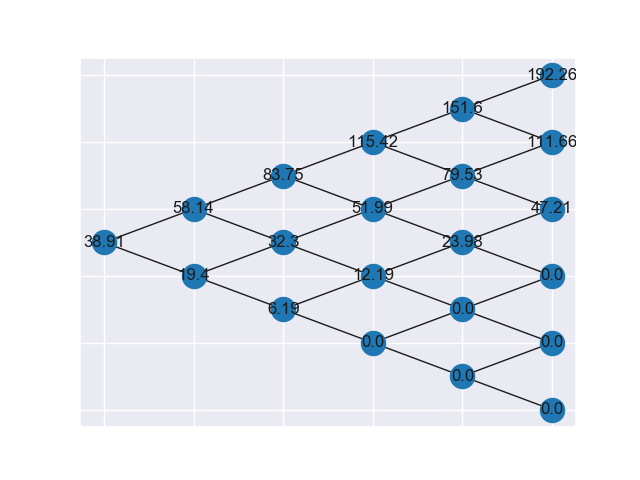

<IPython.core.display.Javascript object>


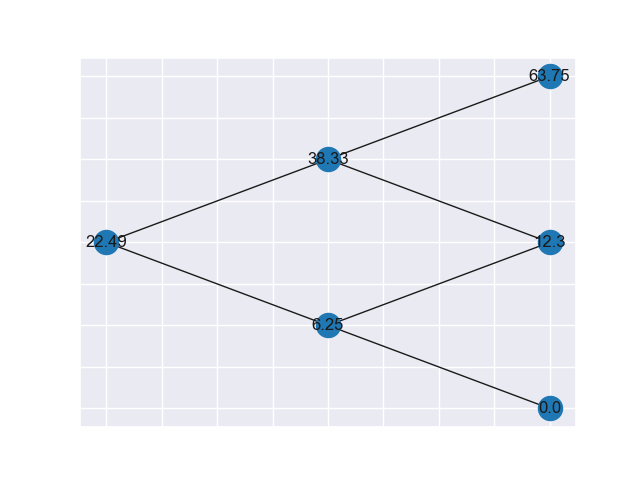

In [146]:
# compound option
S0=230 # stock price 
K1=20  # first strike price
K2=210 # second strike price
T1=0.4 # first  maturity time
T2=1   # second maturity time
risk_free=0.04545 # risk free rate
volatility=0.25   # standard deviation
n=5               # number of steps
optiontype1='call'# contract type
optiontype2='call'# contract type

compound_call(S0,K1,K2,T1,T2,risk_free,volatility,n,optiontype1,optiontype2)


In [147]:
# chooser option
S0=40 # stock price        
K=40  # strike price
T1=1  # first maturity time
T2=2  # second maturity time
risk_free=0.04 # risk free rate
volatility=0.3 # standard deviation

chooser_option(S0,K,T1,T2,risk_free,volatility)

3.209

In [148]:
# barrier option
S0=100  # stock price  
K=90    # strike price
Barrier=85 # barrier price
T=1     # maturity time
risk_free=0.04 # risk free rate
volatility=0.3 # standard deviation
div=0 # divident 

print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'in'))
print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'out'))

4.055
15.094


In [149]:
# barrier option
S0=100 # stock price  
K=90 # strike price
Barrier=95 # barrier price
T=1 # maturity time
risk_free=0.04 # risk free rate
volatility=0.3 # standard deviation
div=0 # divident 

print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'in'))
print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'out'))

12.5993
6.5497


In [150]:
# barrier option
S0=100 # stock price       
K=110 # strike price
Barrier=115 # barrier price
T=1 # maturity time
risk_free=0.04 # risk free rate
volatility=0.08 # standard deviation
div=0 # divident 

print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'in'))
print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'out'))

1.0605
0.1315


In [151]:
# barrier option
S0=100 # stock price      
K=110 # strike price
Barrier=105 # barrier price
T=1 # maturity time
risk_free=0.04 # risk free rate
volatility=0.08 # standard deviation
div=0 # divident 

print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'in'))
print(barrier_option(S0,K,Barrier,T,risk_free,volatility,div,'out'))

1.192
0
